# Time-lapse inversion
In this notebook we will see how to use ResIPy API to do a time-lapse inversion (difference).

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append(os.path.relpath('../src')) # add here the relative path of the API folder
testdir = '../src/examples/dc-2d-timelapse/'
from resipy import Project

API path =  /media/jkl/data/phd/tmp/resipy/src/resipy
ResIPy version =  3.2.0
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


Then we can import all the dataset. Note that they should all be in the same directory and will be sorted according to alphabetical order.

In [2]:
k = Project(typ='R2')
k.createTimeLapseSurvey(testdir + 'data/')

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy
clearing dirname
4/4 imported


In [3]:
k.surveys # to display the list of the surveys object

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


The inversion is seamlessly the same. It will automatically take the first survey os background model. Invert it in a specific `ref` directory inside the working directory and then invert the other datasets.

In [4]:
k.invert(parallel=True) # takes a while because it invert all the surveys together

Creating triangular mesh...Reading mesh.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Triangle
Reading connection matrix...
ignoring 0 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
Done
ResIPy Estimated RAM usage = 0.003639 Gb
done
Writing .in file and protocol.dat... Matching quadrupoles between surveys for difference inversion...314 in common...done in 0.017983s
done!
------------ INVERTING REFERENCE SURVEY ---------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.02 <<

 >> D a t e : 19 - 01 - 2021
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a 

Note that we can visualize the different inverted sections using `R2.showResults(index=0, attr='Resistivity(log10)')`.

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


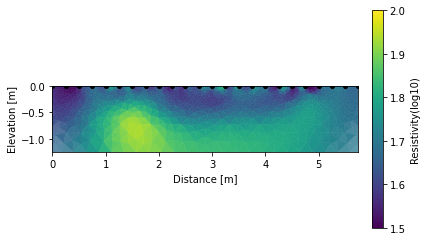

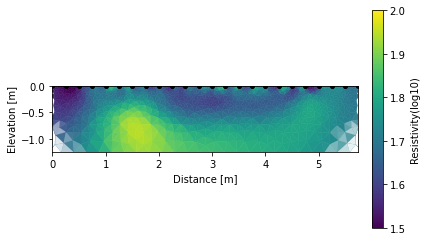

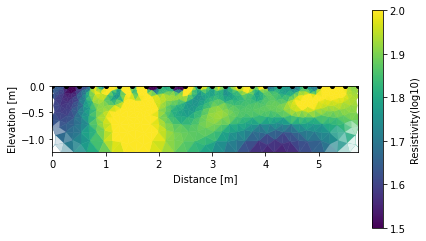

In [5]:
k.showResults(index=0, attr='Resistivity(log10)', contour=False, vmin=1.5, vmax=2)
k.showResults(index=1, attr='Resistivity(log10)', contour=False, vmin=1.5, vmax=2)
k.showResults(index=2, attr='Resistivity(log10)', contour=False, vmin=1.5, vmax=2)

We can also look for the differences between each survey.

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


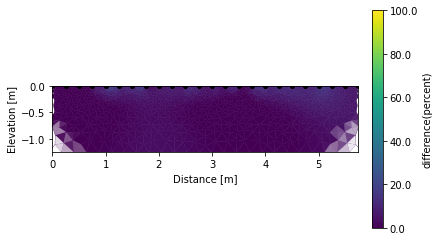

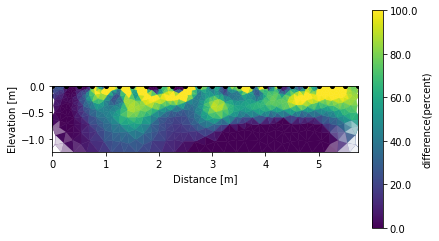

In [6]:
# the differnces are in percent in reference to the backround survey (index=0)
k.showResults(index=1, attr='difference(percent)', contour=False, vmin=0, vmax=100)
k.showResults(index=2, attr='difference(percent)', contour=False, vmin=0, vmax=100)

Like this we can observe a deeper positive change (drying) during the growth season of wheat mainly due to the root water uptake.